# **Import Data**


In [1]:
import pandas as pd

data = pd.read_excel("malaysia_all_data_for_paper.xlsx" )


In [2]:
data

,date,time,temperature ©,humidity(%),holiday,load
0,2009-01-01,01:00:00,24,100,0,30360
1,2009-01-01,02:00:00,24,100,0,29155
2,2009-01-01,03:00:00,24,94,0,28086
3,2009-01-01,04:00:00,24,94,0,28031
4,2009-01-01,05:00:00,24,94,0,27730
...,...,...,...,...,...,...
17515,2010-12-31,20:00:00,26,89,0,53819
17516,2010-12-31,21:00:00,26,83,0,51543
17517,2010-12-31,22:00:00,25,89,0,44961
17518,2010-12-31,23:00:00,24,94,0,38484


# **Plot graph**


In [3]:
df = pd.DataFrame(data)
data_sample = df.sample(n=3000).sort_values(by='date')


In [4]:
data_sample['datetime'] = pd.to_datetime(data_sample['date'].astype(str) + ' ' + data_sample['time'].astype(str))


Text(0, 0.5, 'load')

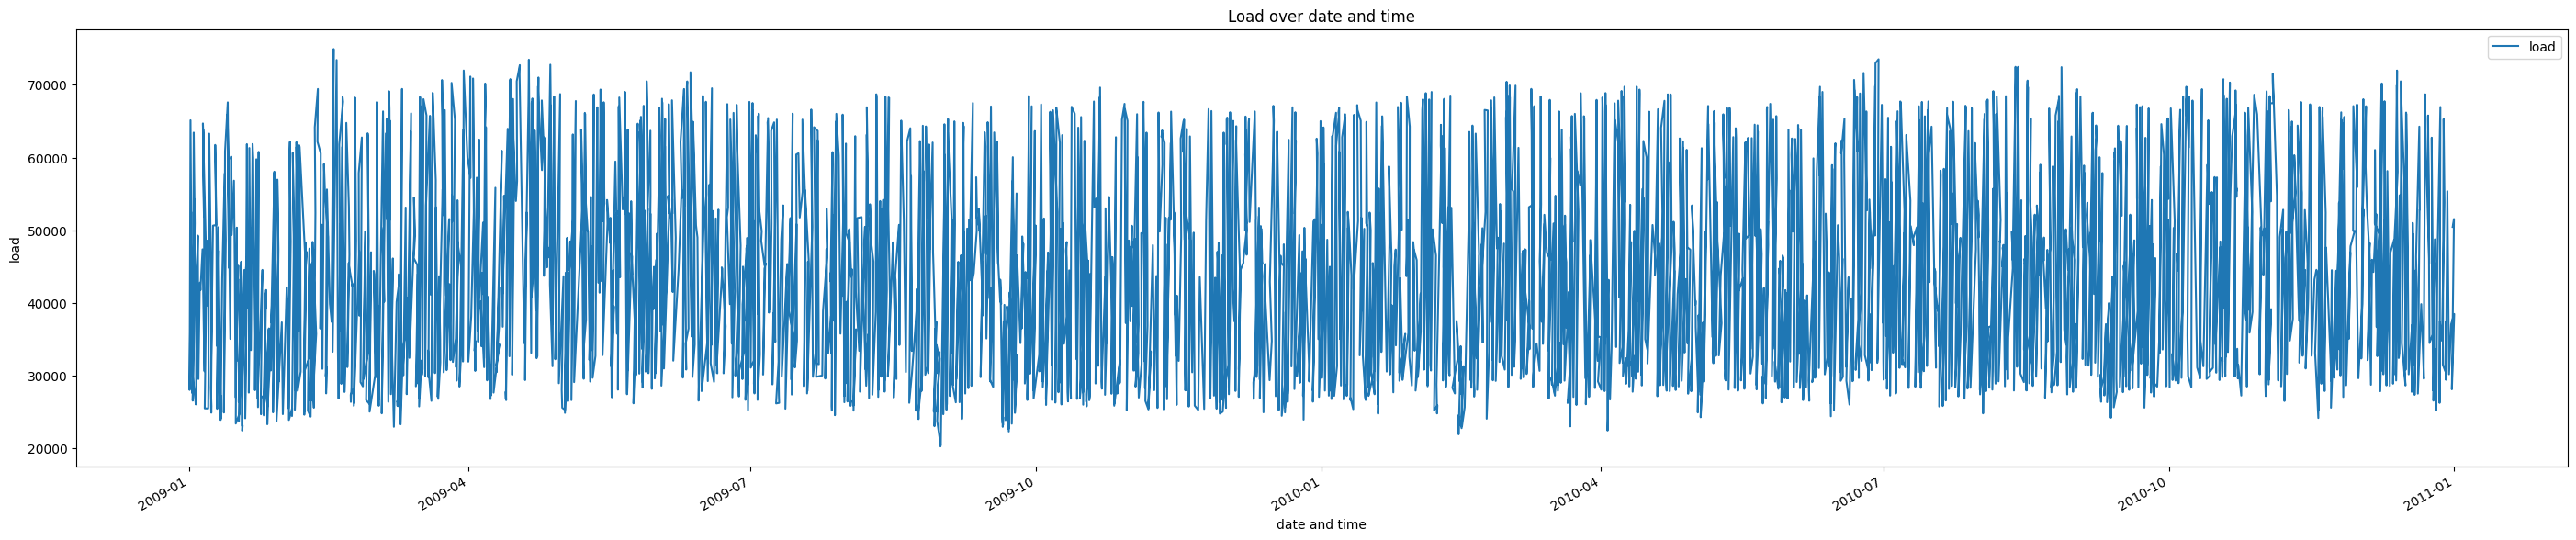

In [5]:
plt_data_sample = data_sample.plot(x='datetime', y='load',figsize=(35,7))
plt_data_sample.set_title("Load over date and time")
plt_data_sample.set_xlabel("date and time")
plt_data_sample.set_ylabel("load")


# **Prepare data**


In [6]:
data['date'] = pd.to_datetime(data['date'].astype(str) + ' ' + data['time'].astype(str))
data = data.drop(['time'], axis=1)


In [7]:
data

,date,temperature ©,humidity(%),holiday,load
0,2009-01-01 01:00:00,24,100,0,30360
1,2009-01-01 02:00:00,24,100,0,29155
2,2009-01-01 03:00:00,24,94,0,28086
3,2009-01-01 04:00:00,24,94,0,28031
4,2009-01-01 05:00:00,24,94,0,27730
...,...,...,...,...,...
17515,2010-12-31 20:00:00,26,89,0,53819
17516,2010-12-31 21:00:00,26,83,0,51543
17517,2010-12-31 22:00:00,25,89,0,44961
17518,2010-12-31 23:00:00,24,94,0,38484


In [8]:
import numpy as np

data.index = pd.to_datetime(data['date'], format='%Y.%m.%d %H:%M:%S')
data

,date,temperature ©,humidity(%),holiday,load
date,,,,,
2009-01-01 01:00:00,2009-01-01 01:00:00,24,100,0,30360
2009-01-01 02:00:00,2009-01-01 02:00:00,24,100,0,29155
2009-01-01 03:00:00,2009-01-01 03:00:00,24,94,0,28086
2009-01-01 04:00:00,2009-01-01 04:00:00,24,94,0,28031
2009-01-01 05:00:00,2009-01-01 05:00:00,24,94,0,27730
...,...,...,...,...,...
2010-12-31 20:00:00,2010-12-31 20:00:00,26,89,0,53819
2010-12-31 21:00:00,2010-12-31 21:00:00,26,83,0,51543
2010-12-31 22:00:00,2010-12-31 22:00:00,25,89,0,44961


In [9]:
df = data.drop(['date'], axis=1)
df

,temperature ©,humidity(%),holiday,load
date,,,,
2009-01-01 01:00:00,24,100,0,30360
2009-01-01 02:00:00,24,100,0,29155
2009-01-01 03:00:00,24,94,0,28086
2009-01-01 04:00:00,24,94,0,28031
2009-01-01 05:00:00,24,94,0,27730
...,...,...,...,...
2010-12-31 20:00:00,26,89,0,53819
2010-12-31 21:00:00,26,83,0,51543
2010-12-31 22:00:00,25,89,0,44961


In [10]:
def df_to_X_y(df, window_size = 6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][3]
    y.append(label)
  return np.array(X), np.array(y)

In [11]:
x, y = df_to_X_y(df)
x, x.shape, y, y.shape

(array([[[24, 100, 0, 30360],
         [24, 100, 0, 29155],
         [24, '94\xa0', 0, 28086],
         [24, '94\xa0', 0, 28031],
         [24, '94\xa0', 0, 27730],
         [24, '94\xa0', 0, 30490]],
 
        [[24, 100, 0, 29155],
         [24, '94\xa0', 0, 28086],
         [24, '94\xa0', 0, 28031],
         [24, '94\xa0', 0, 27730],
         [24, '94\xa0', 0, 30490],
         [24, '94\xa0', 0, 37081]],
 
        [[24, '94\xa0', 0, 28086],
         [24, '94\xa0', 0, 28031],
         [24, '94\xa0', 0, 27730],
         [24, '94\xa0', 0, 30490],
         [24, '94\xa0', 0, 37081],
         [24, '94\xa0', 0, 46975]],
 
        ...,
 
        [[30, '70\xa0', 0, 51163],
         [29, '74\xa0', 0, 50675],
         [28, '79\xa0', 0, 50164],
         [27, '89\xa0', 0, 50947],
         [26, '89\xa0', 0, 53819],
         [26, '83\xa0', 0, 51543]],
 
        [[29, '74\xa0', 0, 50675],
         [28, '79\xa0', 0, 50164],
         [27, '89\xa0', 0, 50947],
         [26, '89\xa0', 0, 53819],
        

In [12]:
x = np.asarray(x).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [13]:
x, x.shape, y, y.shape

(array([[[2.4000e+01, 1.0000e+02, 0.0000e+00, 3.0360e+04],
         [2.4000e+01, 1.0000e+02, 0.0000e+00, 2.9155e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04]],
 
        [[2.4000e+01, 1.0000e+02, 0.0000e+00, 2.9155e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.7081e+04]],
 
        [[2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.70

# **Split data for training, validation and testing**

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, shuffle=False)

In [16]:
x_train, y_train, x_val, y_val, x_test, y_test

(array([[[2.4000e+01, 1.0000e+02, 0.0000e+00, 3.0360e+04],
         [2.4000e+01, 1.0000e+02, 0.0000e+00, 2.9155e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04]],
 
        [[2.4000e+01, 1.0000e+02, 0.0000e+00, 2.9155e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.7081e+04]],
 
        [[2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.70

# **Preprocess data**

In [17]:
temp_training_mean = np.mean(x_train[:, :, 3])
temp_training_std = np.std(x_train[:, :, 3])

def preprocess(X):
  X[:, :, 3] = (X[:, :, 3] - temp_training_mean) / temp_training_std
  return X

In [18]:
preprocess(x_train)
preprocess(x_val)
preprocess(x_test)

array([[[ 2.7000000e+01,  8.4000000e+01,  1.0000000e+00,  3.6193055e-01],
        [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -3.9405671e-01],
        [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -7.9419523e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -8.9306527e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -9.7531796e-01]],

       [[ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -3.9405671e-01],
        [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -7.9419523e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -8.9306527e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -9.7531796e-01],
        [ 2.4000000e+01,  1.0000000e+02,  1.0000000e+00, -1.0498528e+00]],

       [[ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
        [ 2.5000000e+01,  9.400000

In [19]:
x_train.shape, x_val.shape, x_test.shape

((11208, 6, 4), (2803, 6, 4), (3503, 6, 4))

In [20]:

def preprocess1(Y):
  Y[:] = (Y[:] - temp_training_mean) / temp_training_std
  return Y

In [21]:
preprocess1(y_train)
preprocess1(y_val)
preprocess1(y_test)

array([-1.0498528 , -1.142952  , -1.1491401 , ...,  0.06837973,
       -0.38195866, -0.5039818 ], dtype=float32)

In [22]:
y_train.shape, y_val.shape, y_test.shape

((11208,), (2803,), (3503,))

# **Train and validate data**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam



In [24]:
x_train, x_train.shape, y_train, y_train.shape, x_val, x_val.shape, y_val, y_val.shape

(array([[[ 24.        , 100.        ,   0.        ,  -0.9468111 ],
         [ 24.        , 100.        ,   0.        ,  -1.0305934 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1049197 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1087438 ],
         [ 24.        ,  94.        ,   0.        ,  -1.129672  ],
         [ 24.        ,  94.        ,   0.        ,  -0.93777233]],
 
        [[ 24.        , 100.        ,   0.        ,  -1.0305934 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1049197 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1087438 ],
         [ 24.        ,  94.        ,   0.        ,  -1.129672  ],
         [ 24.        ,  94.        ,   0.        ,  -0.93777233],
         [ 24.        ,  94.        ,   0.        ,  -0.47950765]],
 
        [[ 24.        ,  94.        ,   0.        ,  -1.1049197 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1087438 ],
         [ 24.        ,  94.        ,   0.        ,  -1.

In [25]:

model1 = Sequential()
model1.add(InputLayer((6, 4)))
model1.add(LSTM(512, return_sequences=False))
model1.add(Dropout(0.25))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))


In [26]:

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 512)                 │       1,058,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │           4,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,062,929 (4.05 MB)

 Trainable params: 1,062,929 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model1.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), metrics=[RootMeanSquaredError()])
cp1 = ModelCheckpoint('/models/model4/model4.keras', save_best_only=True)


In [28]:
model1.fit(x_train, y_train, epochs=50, batch_size=1, validation_data=(x_val, y_val), callbacks=[cp1])

Epoch 1/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 259s 23ms/step - loss: 0.2471 - root_mean_squared_error: 0.4720 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1578
Epoch 2/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 257s 23ms/step - loss: 0.0366 - root_mean_squared_error: 0.1913 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1759
Epoch 3/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 245s 22ms/step - loss: 0.0303 - root_mean_squared_error: 0.1740 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1595
Epoch 4/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 245s 22ms/step - loss: 0.0248 - root_mean_squared_error: 0.1573 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1339
Epoch 5/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 246s 22ms/step - loss: 0.0237 - root_mean_squared_error: 0.1538 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1269
Epoch 6/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 247s 22ms/step - loss: 0.0215 - root_mean_squared_error: 0.1466 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1260
Epoch 7/50

# **Test Model**

In [29]:
x_test, x_test.shape, y_test, y_test.shape

(array([[[ 2.7000000e+01,  8.4000000e+01,  1.0000000e+00,  3.6193055e-01],
         [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -3.9405671e-01],
         [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -7.9419523e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -8.9306527e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -9.7531796e-01]],
 
        [[ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -3.9405671e-01],
         [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -7.9419523e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -8.9306527e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -9.7531796e-01],
         [ 2.4000000e+01,  1.0000000e+02,  1.0000000e+00, -1.0498528e+00]],
 
        [[ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
         [ 2.500000

In [30]:
from tensorflow.keras.models import load_model
model_lstm_1layer = load_model('/models/model4/model4.keras')

In [31]:

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, legend

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start :end])
  plt.plot(df['Actuals'][start: end])
  plt.legend(['LSTM', 'actual'])
  return df

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


,Predictions,Actuals
0,-1.027927,-1.049853
1,-1.095587,-1.142952
2,-1.155749,-1.149140
3,-1.112801,-1.032888
4,-0.903936,-1.063898
...,...,...
3498,0.347455,0.684266
3499,0.464506,0.526019
3500,-0.161469,0.068380
3501,-0.247080,-0.381959


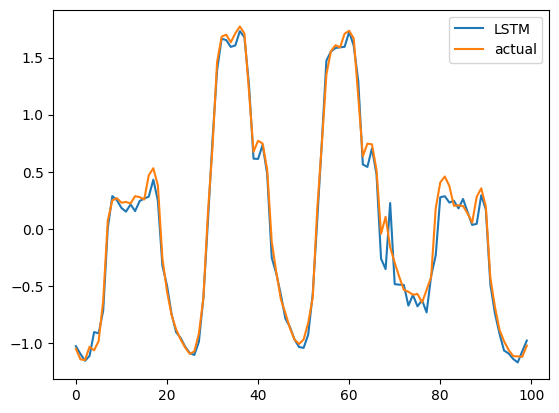

In [32]:
plot_predictions1(model_lstm_1layer, x_test, y_test)

# **2-layer LSTM**

In [33]:

model2 = Sequential()
model2.add(InputLayer((6, 4)))
model2.add(LSTM(512, return_sequences=True))
model2.add(Dropout(0.25))
model2.add(LSTM(512, return_sequences=False))
model2.add(Dropout(0.25))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 6, 512)              │       1,058,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 512)                 │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,158,529 (12.05 MB)

 Trainable params: 3,158,529 (12.05 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model2.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), metrics=[RootMeanSquaredError()])
cp2 = ModelCheckpoint('/models/model5/model5.keras', save_best_only=True)


In [ ]:
model2.fit(x_train, y_train, epochs=50, batch_size=1, validation_data=(x_val, y_val), callbacks=[cp2], shuffle = True)

Epoch 1/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 756s 67ms/step - loss: 0.3040 - root_mean_squared_error: 0.5182 - val_loss: 0.0504 - val_root_mean_squared_error: 0.2244
Epoch 2/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 750s 67ms/step - loss: 0.0479 - root_mean_squared_error: 0.2186 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1602
Epoch 3/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 750s 67ms/step - loss: 0.0348 - root_mean_squared_error: 0.1866 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1563
Epoch 4/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 732s 65ms/step - loss: 0.0292 - root_mean_squared_error: 0.1708 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1410
Epoch 5/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 724s 65ms/step - loss: 0.0264 - root_mean_squared_error: 0.1625 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1349
Epoch 6/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 729s 65ms/step - loss: 0.0249 - root_mean_squared_error: 0.1576 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1297
Epoch 7/50

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


,Predictions,Actuals
0,-1.064251,-1.049853
1,-1.156498,-1.142952
2,-1.196793,-1.149140
3,-1.159738,-1.032888
4,-0.995623,-1.063898
...,...,...
3498,0.519237,0.684266
3499,0.551826,0.526019
3500,-0.178981,0.068380
3501,-0.445870,-0.381959


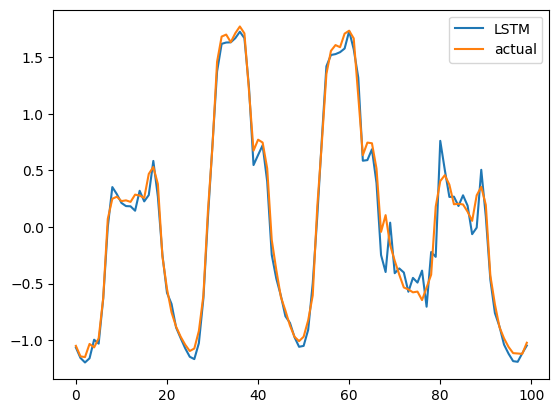

In [47]:
model_lstm_2layer = load_model('/models/model5/model5.keras')
plot_predictions1(model_lstm_2layer, x_test, y_test)

# **3-layer LSTM**

In [ ]:
model3 = Sequential()
model3.add(InputLayer((6, 4)))
model3.add(LSTM(512, return_sequences=True))
model2.add(Dropout(0.25))
model3.add(LSTM(512, return_sequences=True))
model2.add(Dropout(0.25))
model3.add(LSTM(512, return_sequences=False))
model3.add(Dropout(0.25))
model1.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

In [ ]:
model3.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), metrics=[RootMeanSquaredError()])
cp3 = ModelCheckpoint('/models/model6/model6.keras', save_best_only=True)

In [39]:
model3.fit(x_train, y_train, epochs=50, batch_size=1, validation_data=(x_val, y_val), callbacks=[cp3], shuffle = True)

11208/11208 ━━━━━━━━━━━━━━━━━━━━ 1166s 104ms/step - loss: 0.2381 - root_mean_squared_error: 0.4544 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1590
Epoch 2/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 1306s 117ms/step - loss: 0.0341 - root_mean_squared_error: 0.1843 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1339
Epoch 3/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 1491s 133ms/step - loss: 0.0236 - root_mean_squared_error: 0.1537 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1362
Epoch 4/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 1476s 132ms/step - loss: 0.0205 - root_mean_squared_error: 0.1432 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1434
Epoch 5/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 1474s 131ms/step - loss: 0.0182 - root_mean_squared_error: 0.1348 - val_loss: 0.0438 - val_root_mean_squared_error: 0.2093
Epoch 6/50
11208/11208 ━━━━━━━━━━━━━━━━━━━━ 1376s 123ms/step - loss: 0.0182 - root_mean_squared_error: 0.1346 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1259
Epoch 7/5

110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step


,Predictions,Actuals
0,-1.052397,-1.049853
1,-1.104109,-1.142952
2,-1.130327,-1.149140
3,-1.068402,-1.032888
4,-0.904591,-1.063898
...,...,...
3498,0.468002,0.684266
3499,0.524541,0.526019
3500,-0.141599,0.068380
3501,-0.372740,-0.381959


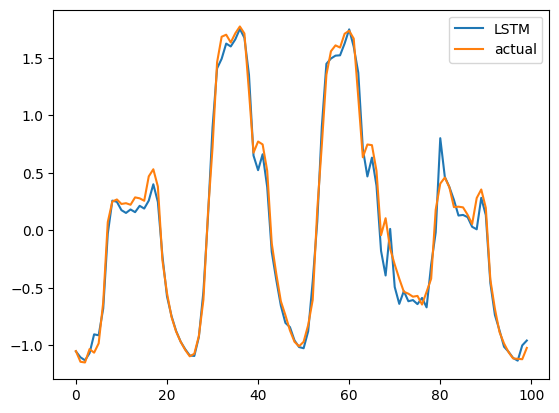

In [40]:
model_lstm_3layer = load_model('/models/model6/model6.keras')
plot_predictions1(model_lstm_3layer, x_test, y_test)

# **Comparison between different models**

In [41]:


def plot_predictions2(model1, model2, model3, X, y):
  predictions1 = model1.predict(X).flatten()*np.
  predictions2 = model2.predict(X).flatten()
  predictions3 = model3.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions1': predictions1, 'Predictions2': predictions2, 'Predictions3': predictions3, 'Actuals':y})
  plt.plot(df['Predictions1'][3400 :])
  plt.plot(df['Predictions2'][3400 :])
  plt.plot(df['Predictions3'][3400 :])
  plt.plot(df['Actuals'][3400:])
  plt.legend(['LSTM_1layer', 'LSTM_2layer', 'LSTM_3layer', 'actual'])
  figure(figsize=(60 , 650), dpi=80)
  return df

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


,Predictions1,Predictions2,Predictions3,Actuals
0,-1.027927,-1.064251,-1.052397,-1.049853
1,-1.095587,-1.156498,-1.104109,-1.142952
2,-1.155749,-1.196793,-1.130327,-1.149140
3,-1.112801,-1.159738,-1.068402,-1.032888
4,-0.903936,-0.995623,-0.904591,-1.063898
...,...,...,...,...
3498,0.347455,0.519237,0.468002,0.684266
3499,0.464506,0.551826,0.524541,0.526019
3500,-0.161469,-0.178981,-0.141599,0.068380
3501,-0.247080,-0.445870,-0.372740,-0.381959


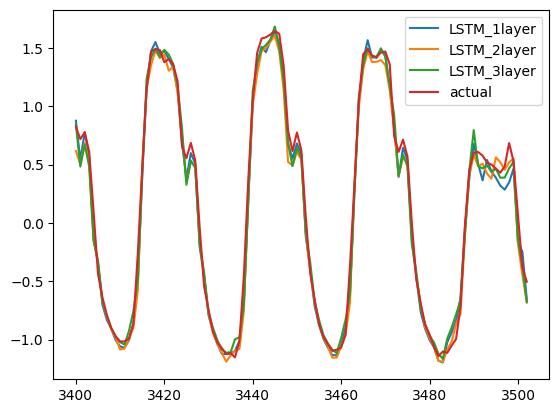

<Figure size 4800x52000 with 0 Axes>

In [42]:
plot_predictions2(model_lstm_1layer, model_lstm_2layer, model_lstm_3layer, x_test, y_test)

In [43]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [44]:
def rmse(y_true, y_pred):
  return np.sqrt(mse(y_true, y_pred))

In [45]:
def comparison(model1, model2, model3, X, y):
  model = ['lstm_1layer', 'lstm_2layer', 'lstm_3layer']
  predictions = []
  mape_i = []
  mse_i = []
  rmse_i = []
  mae_i = []
  predictions.append(model1.predict(X).flatten())
  predictions.append(model2.predict(X).flatten())
  predictions.append(model3.predict(X).flatten())

  for i in range(len(predictions)):
    mape_i.append(mape(predictions[i], y)*100)
    mse_i.append(mse(predictions[i], y))
    rmse_i.append(rmse(predictions[i], y))
    mae_i.append(mae(predictions[i], y))
    i+=1

  df = pd.DataFrame(data={'Predictions': model, 'MAPE(%)': mape_i, 'MSE': mse_i, 'RMSE': rmse_i, 'MAE': mae_i})


  return df

In [46]:
comparison(model_lstm_1layer, model_lstm_2layer, model_lstm_3layer, x_test, y_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step


,Predictions,MAPE(%),MSE,RMSE,MAE
0,lstm_1layer,48.701015,0.019638,0.140135,0.081456
1,lstm_2layer,38.724229,0.022704,0.150678,0.090412
2,lstm_3layer,38.068527,0.021615,0.147019,0.083187
